<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


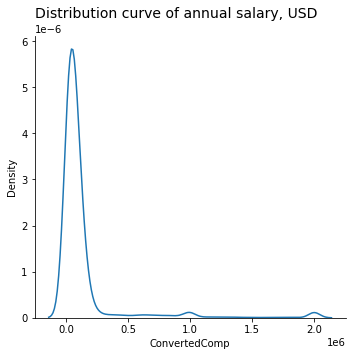

In [28]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

dist=sns.displot(data=df['ConvertedComp'], kind="kde", height=5)

dist.fig.subplots_adjust(top=0.90)
dist.fig.suptitle('Distribution curve of annual salary, USD', fontsize = 14)


plt.show()


Plot the histogram for the column `ConvertedComp`.


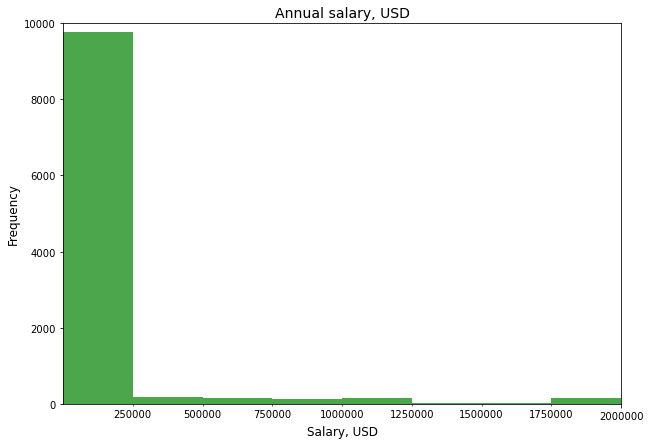

In [5]:
from matplotlib.pyplot import figure
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

ax.set_title('Annual salary, USD', fontsize=14)
  
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Salary, USD', fontsize=12)
 
ax.set_xlim(1, 2000000)
ax.set_ylim(0, 10000)


ax.xaxis.set_major_locator(MultipleLocator(2000000))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
  
#:,.0f
ax.xaxis.set_minor_locator(MultipleLocator(250000))
ax.xaxis.set_minor_formatter(FormatStrFormatter('%.0f'))

num_bins=8
ax.hist(df['ConvertedComp'], num_bins, color ='green', 
                           alpha = 0.7)


plt.show()

What is the median of the column `ConvertedComp`?


In [7]:
median=df['ConvertedComp'].median()
print(f'The median of annual salary is {median} USD.')

The median of annual salary is 57745.0 USD.


How many responders identified themselves only as a **Man**?


In [8]:
men=len(df[df["Gender"]=='Man'])
print(f'{men} respondents identified themselves only as a Man.')

10480 respondents identified themselves only as a Man.


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [9]:
women=df['ConvertedComp'][df["Gender"]=='Woman']
median_ConvertedComp_women=women.median()

print(f'The median annual salary of respondents identified themselves only as a Woman is {median_ConvertedComp_women} USD.')

The median annual salary of respondents identified themselves only as a Woman is 57708.0 USD.


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


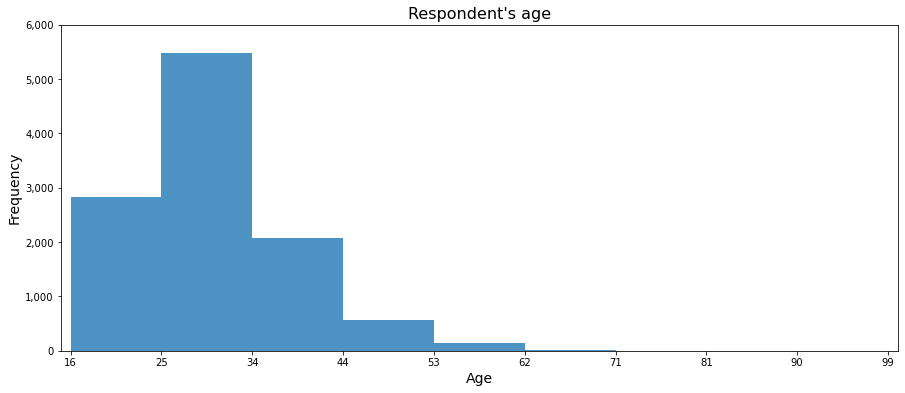

In [16]:
import numpy as np
from matplotlib.ticker import StrMethodFormatter

df_age=df['Age'].dropna()

count, bin_edges=np.histogram(df_age, 9)
df_age.plot(kind='hist', figsize=(15,6), bins=9, alpha=0.8, xticks=bin_edges)

plt.title("Respondent's age", fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)

ax = plt.gca()
ax.set_xlim([15, 100])
ax.set_ylim([0, 6000])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


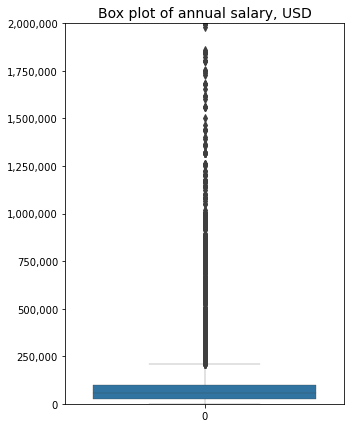

In [18]:
#import seaborn as sns

plt.figure(figsize=(5,7))
plt.title('Box plot of annual salary, USD', fontsize=14)


ax = plt.gca()
ax.set_ylim([0, 2000000])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

box=sns.boxplot(data=df['ConvertedComp'], linewidth=0.3)

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [20]:
Q1=df['ConvertedComp'].quantile(0.25)
Q3=df['ConvertedComp'].quantile(0.75)

IQR=Q3-Q1

print(f'The Inter Quartile Range for annual salary is {IQR} USD.')


The Inter Quartile Range for annual salary is 73132.0 USD.


Find out the upper and lower bounds.


In [16]:
df['ConvertedComp'].describe().apply("{0:.3f}".format)


count      10582.000
mean      131596.732
std       294786.516
min            0.000
25%        26868.000
50%        57745.000
75%       100000.000
max      2000000.000
Name: ConvertedComp, dtype: object

Identify how many outliers are there in the `ConvertedComp` column.


In [21]:
outliers=Q3+1.5*IQR

amount_outliers=len(df[df['ConvertedComp']>outliers])

print(f'There are {amount_outliers} in the ConvertedComp column.')

There are 879 in the ConvertedComp column.


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [22]:
df_without_outliers=df[df['ConvertedComp']<=outliers]


#median_df_without_outliers=df_without_outliers['ConvertedComp'].median()

round(df_without_outliers.describe(),1)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,9703.0,9703.0,9703.0,9664.0,7612.0,9493.0
mean,12501.0,724113.9,59883.2,41.9,4.7,30.7
std,7235.6,7186805.9,43394.3,24.6,4.4,7.3
min,4.0,0.0,0.0,3.0,0.0,16.0
25%,6237.0,20000.0,24060.0,40.0,2.0,25.0
50%,12571.0,63000.0,52704.0,40.0,4.0,29.0
75%,18787.5,115000.0,85574.5,42.0,5.0,34.0
max,25141.0,390000000.0,209356.0,1012.0,99.0,99.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [23]:
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
